# Python Project -- Credit Scoring

## Part I: Data Preparation

### Loading data and set options

In [1]:
data ='/Users/sallyfan/Study/Nottingham/Python/data/LoanData.csv'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import zipfile
import scipy


# Pandas display options
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_info_columns', 500)
pd.set_option('display.max_info_rows', 4000)
pd.set_option('display.expand_frame_repr', True)
pd.set_option('display.width', 2000)
pd.set_option('display.max_rows', 500)

import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install xlrd
!pip install openpyxl

In [4]:
loandata = pd.read_csv('/Users/sallyfan/Study/Nottingham/Python/data/LoanData.csv', low_memory=False,parse_dates=True)
loandata.head(3)

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,PartyId,NewCreditCustomer,LoanApplicationStartedDate,LoanDate,ContractEndDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,DateOfBirth,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,NrOfDependants,EmploymentStatus,EmploymentDurationCurrentEmployer,EmploymentPosition,WorkExperience,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,ActiveScheduleFirstPaymentReached,PlannedPrincipalTillDate,PlannedInterestTillDate,LastPaymentOn,CurrentDebtDaysPrimary,DebtOccuredOn,CurrentDebtDaysSecondary,DebtOccuredOnForSecondary,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,DefaultDate,PrincipalOverdueBySchedule,PlannedPrincipalPostDefault,PlannedInterestPostDefault,EAD1,EAD2,PrincipalRecovery,InterestRecovery,RecoveryStage,StageActiveSince,ModelVersion,Rating,EL_V0,Rating_V0,EL_V1,Rating_V1,Rating_V2,Status,Restructured,ActiveLateCategory,WorseLateCategory,CreditScoreEsMicroL,CreditScoreEsEquifaxRisk,CreditScoreFiAsiakasTietoRiskGrade,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,2021-12-17,66AE108B-532B-4BB3-BAB7-0019A46412C1,483449,2016-03-23 16:07:19,2016-03-23 16:07:19,970,1150.0,5.0,{EBF05573-554D-4A3B-BC77-A2CF00B7D110},False,2016-03-17 12:39:22,2016-03-23,2020-06-26,2016-05-12,2021-04-12,2020-06-26,17,4,4.0,1,53,NaN,1.0,EE,2125.0,2125.0,20.97,60,62.05,NaN,NaN,2,4.0,2.0,0,6.0,MoreThan5Years,NaN,15To25Years,1.0,1.0,0.0,301.0,0.0,53.0,0.0,0.0,0.0,354.0,8,485.09,6,26.29,10.92,12,True,630.22,1251.98,2021-12-06,702.0,2020-01-14,780.0,2019-10-28,0.068512,0.58,0.141145,0.122216,2020-01-14,1141.84,1251.98,77.68,1251.98,64.07,110.14,0.0,2.0,2020-03-03 09:27:48.493000000,2.0,C,NaN,NaN,NaN,NaN,C,Late,False,180+,180+,NaN,NaN,NaN,1000.0,983.16,1187.91,0.00,0.00,1141.84,507.21,1.0,500.0,590.95,0.0,0.0,2019-10-28,2020-01-27,NaN,NaN,NaN,NaN,0.00,59.26,8-15
1,2021-12-17,D152382E-A50D-46ED-8FF2-0053E0C86A70,378148,2015-06-25 11:02:28,2015-06-25 11:02:28,1295,0.0,1705.0,{46C6CBA4-0FBE-44AD-9304-A3EF0111A5FB},False,2015-06-24 12:36:16,2015-06-25,NaN,2015-08-17,2020-07-17,2020-07-17,11,5,1.0,1,50,NaN,1.0,EE,3000.0,3000.0,17.12,60,84.75,NaN,NaN,3,5.0,2.0,0,5.0,MoreThan5Years,NaN,MoreThan25Years,7.0,1.0,900.0,0.0,0.0,0.0,0.0,0.0,0.0,900.0,4,736.45,0,30.58,78.80,17,True,1333.51,3000.00,2019-06-19,2068.0,2016-04-18,2129.0,2016-02-17,0.030799,0.65,0.140436,0.036449,2016-06-02,2436.41,2658.82,1078.96,2730.84,2370.77,294.43,0.0,2.0,2019-08-01 14:18:33,1.0,B,NaN,NaN,0.030799,B,B,Late,False,180+,180+,NaN,NaN,NaN,1000.0,563.59,360.07,0.00,0.00,2436.41,2429.70,1.0,1800.0,445.26,3000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,47.08,180+
2,2021-12-17,87342E13-66CB-483F-833A-007953E50C78,451831,2016-01-14 10:00:21,2016-01-14 10:00:21,2700,565.0,5835.0,{CA64DA9B-8E95-450E-9EFE-A58601016DB2},True,2016-01-07 15:37:16,2016-01-19,2019-10-24,2016-02-22,2021-01-20,2021-01-20,22,3,4.0,1,44,NaN,0.0,EE,10630.0,9100.0,13.67,60,268.57,NaN,NaN,3,4.0,4.0,1,5.0,UpTo3Years,NaN,MoreThan25Years,8.0,8.0,600.0,0.0,0.0,0.0,0.0,0.0,600.0,1200.0,7,905.00,3,26.71,349.43,20,True,3348.50,9100.00,2019-10-23,1518.0,2017-10-20,

In [5]:
loandata.dtypes.value_counts()

float64    63
object     35
int64      11
bool        3
dtype: int64

### General data preparation

In [6]:
#Drop the column that represent customer ID
loandata = loandata.drop(['ReportAsOfEOD','LoanId','LoanNumber','PartyId'], 1)

In [7]:
# Check the loan status and distinct the target value.
loandata['Status'].value_counts()

Current    72282
Late       69312
Repaid     64477
Name: Status, dtype: int64

In [8]:
#Select the finished loan including repaid and late, delete the 'current' loan
goodloan = loandata[(loandata.Status == "Repaid") ].index
badloan = loandata[(loandata.Status == "Late") ].index
loan = loandata.loc[goodloan|badloan]
loan = loan.reset_index(drop=True)
loan['loanstatus'] = loan.Status.map({'Repaid':0,'Late':1})
loan = loan.drop(['Status'], 1)
loan.head(3)

,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,LoanApplicationStartedDate,LoanDate,ContractEndDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,DateOfBirth,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,NrOfDependants,EmploymentStatus,EmploymentDurationCurrentEmployer,EmploymentPosition,WorkExperience,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,ActiveScheduleFirstPaymentReached,PlannedPrincipalTillDate,PlannedInterestTillDate,LastPaymentOn,CurrentDebtDaysPrimary,DebtOccuredOn,CurrentDebtDaysSecondary,DebtOccuredOnForSecondary,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,DefaultDate,PrincipalOverdueBySchedule,PlannedPrincipalPostDefault,PlannedInterestPostDefault,EAD1,EAD2,PrincipalRecovery,InterestRecovery,RecoveryStage,StageActiveSince,ModelVersion,Rating,EL_V0,Rating_V0,EL_V1,Rating_V1,Rating_V2,Restructured,ActiveLateCategory,WorseLateCategory,CreditScoreEsMicroL,CreditScoreEsEquifaxRisk,CreditScoreFiAsiakasTietoRiskGrade,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory,loanstatus
0,2016-03-23 16:07:19,2016-03-23 16:07:19,970,1150.0,5.0,False,2016-03-17 12:39:22,2016-03-23,2020-06-26,2016-05-12,2021-04-12,2020-06-26,17,4,4.0,1,53,NaN,1.0,EE,2125.0,2125.0,20.97,60,62.05,NaN,NaN,2,4.0,2.0,0,6.0,MoreThan5Years,NaN,15To25Years,1.0,1.0,0.0,301.0,0.0,53.0,0.0,0.0,0.0,354.0,8,485.09,6,26.29,10.92,12,True,630.22,1251.98,2021-12-06,702.0,2020-01-14,780.0,2019-10-28,0.068512,0.58,0.141145,0.122216,2020-01-14,1141.84,1251.98,77.68,1251.98,64.07,110.14,0.0,2.0,2020-03-03 09:27:48.493000000,2.0,C,NaN,NaN,NaN,NaN,C,False,180+,180+,NaN,NaN,NaN,1000.0,983.16,1187.91,0.00,0.00,1141.84,507.21,1.0,500.0,590.95,0.0,0.0,2019-10-28,2020-01-27,NaN,NaN,NaN,NaN,0.00,59.26,8-15,1
1,2015-06-25 11:02:28,2015-06-25 11:02:28,1295,0.0,1705.0,False,2015-06-24 12:36:16,2015-06-25,NaN,2015-08-17,2020-07-17,2020-07-17,11,5,1.0,1,50,NaN,1.0,EE,3000.0,3000.0,17.12,60,84.75,NaN,NaN,3,5.0,2.0,0,5.0,MoreThan5Years,NaN,MoreThan25Years,7.0,1.0,900.0,0.0,0.0,0.0,0.0,0.0,0.0,900.0,4,736.45,0,30.58,78.80,17,True,1333.51,3000.00,2019-06-19,2068.0,2016-04-18,2129.0,2016-02-17,0.030799,0.65,0.140436,0.036449,2016-06-02,2436.41,2658.82,1078.96,2730.84,2370.77,294.43,0.0,2.0,2019-08-01 14:18:33,1.0,B,NaN,NaN,0.030799,B,B,False,180+,180+,NaN,NaN,NaN,1000.0,563.59,360.07,0.00,0.00,2436.41,2429.70,1.0,1800.0,445.26,3000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,47.08,180+,1
2,2016-01-14 10:00:21,2016-01-14 10:00:21,2700,565.0,5835.0,True,2016-01-07 15:37:16,2016-01-19,2019-10-24,2016-02-22,2021-01-20,2021-01-20,22,3,4.0,1,44,NaN,0.0,EE,10630.0,9100.0,13.67,60,268.57,NaN,NaN,3,4.0,4.0,1,5.0,UpTo3Years,NaN,MoreThan25Years,8.0,8.0,600.0,0.0,0.0,0.0,0.0,0.0,600.0,1200.0,7,905.00,3,26.71,349.43,20,True,3348.50,9100.00,2019-10-23,1518.0,2017-10-20,1578.0,2017-08-21,0.023177,0.58,0.113484,0.041344,2017-12-06,0.00,6456.37,1537.37,6723.01,5014.54,4160.01,0.0,2.0,2018-02-28 14:43:37.670000000,2.0,A,NaN,NaN,NaN,NaN,A,False,180+,180+,NaN,NaN,NaN,1000.0,6537.00,1708.47,2303.33,0.88,0.00,0.00,0.0,0.0,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,259.67,1659.60,180+,0


In [9]:
##Finding the the count and percentage of values that are missing in the dataframe.
null1 = pd.DataFrame({'Count': loan.isnull().sum(), 'Percent': 100*loan.isnull().sum()/len(loan)})

##printing columns with null count more than 0
null1[null1['Count'] > 0]


,Count,Percent
ContractEndDate,51594,38.563709
VerificationType,50,0.037372
DateOfBirth,133789,100.000000
Gender,45,0.033635
MonthlyPayment,6665,4.981725
County,133789,100.000000
City,133789,100.000000
Education,50,0.037372
MaritalStatus,50,0.037372
NrOfDependants,99457,74.338698


In [10]:
##drop columns containing more than 50% NaN value
rest1= int(0.5*loan.shape[0])
loan=loan.dropna(axis=1, thresh=rest1)

In [11]:
loan.head(5)

,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,LoanApplicationStartedDate,LoanDate,ContractEndDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,ActiveScheduleFirstPaymentReached,PlannedInterestTillDate,LastPaymentOn,CurrentDebtDaysPrimary,DebtOccuredOn,CurrentDebtDaysSecondary,DebtOccuredOnForSecondary,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,DefaultDate,PrincipalOverdueBySchedule,PlannedPrincipalPostDefault,PlannedInterestPostDefault,EAD1,EAD2,PrincipalRecovery,InterestRecovery,RecoveryStage,StageActiveSince,ModelVersion,Rating,Restructured,ActiveLateCategory,WorseLateCategory,CreditScoreEsMicroL,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory,loanstatus
0,2016-03-23 16:07:19,2016-03-23 16:07:19,970,1150.0,5.0,False,2016-03-17 12:39:22,2016-03-23,2020-06-26,2016-05-12,2021-04-12,2020-06-26,17,4,4.0,1,53,1.0,EE,2125.0,2125.0,20.97,60,62.05,2,4.0,2.0,6.0,MoreThan5Years,1.0,1.0,0.0,301.0,0.0,53.0,0.0,0.0,0.0,354.0,8,485.09,6,26.29,10.92,12,True,1251.98,2021-12-06,702.0,2020-01-14,780.0,2019-10-28,0.068512,0.58,0.141145,0.122216,2020-01-14,1141.84,1251.98,77.68,1251.98,64.07,110.14,0.0,2.0,2020-03-03 09:27:48.493000000,2.0,C,False,180+,180+,NaN,1000.0,983.16,1187.91,0.00,0.00,1141.84,507.21,1.0,500.0,590.95,0.0,0.00,59.26,8-15,1
1,2015-06-25 11:02:28,2015-06-25 11:02:28,1295,0.0,1705.0,False,2015-06-24 12:36:16,2015-06-25,NaN,2015-08-17,2020-07-17,2020-07-17,11,5,1.0,1,50,1.0,EE,3000.0,3000.0,17.12,60,84.75,3,5.0,2.0,5.0,MoreThan5Years,7.0,1.0,900.0,0.0,0.0,0.0,0.0,0.0,0.0,900.0,4,736.45,0,30.58,78.80,17,True,3000.00,2019-06-19,2068.0,2016-04-18,2129.0,2016-02-17,0.030799,0.65,0.140436,0.036449,2016-06-02,2436.41,2658.82,1078.96,2730.84,2370.77,294.43,0.0,2.0,2019-08-01 14:18:33,1.0,B,False,180+,180+,NaN,1000.0,563.59,360.07,0.00,0.00,2436.41,2429.70,1.0,1800.0,445.26,1.0,0.00,47.08,180+,1
2,2016-01-14 10:00:21,2016-01-14 10:00:21,2700,565.0,5835.0,True,2016-01-07 15:37:16,2016-01-19,2019-10-24,2016-02-22,2021-01-20,2021-01-20,22,3,4.0,1,44,0.0,EE,10630.0,9100.0,13.67,60,268.57,3,4.0,4.0,5.0,UpTo3Years,8.0,8.0,600.0,0.0,0.0,0.0,0.0,0.0,600.0,1200.0,7,905.00,3,26.71,349.43,20,True,9100.00,2019-10-23,1518.0,2017-10-20,1578.0,2017-08-21,0.023177,0.58,0.113484,0.041344,2017-12-06,0.00,6456.37,1537.37,6723.01,5014.54,4160.01,0.0,2.0,2018-02-28 14:43:37.670000000,2.0,A,False,180+,180+,NaN,1000.0,6537.00,1708.47,2303.33,0.88,0.00,0.00,0.0,0.0,0.00,0.0,259.67,1659.60,180+,0
3,2015-03-24 15:55:44,2015-03-24 15:55:44,1115,0.0,385.0,True,2015-03-20 15:20:48,2015-03-27,NaN,2015-05-04,2020-04-01,2020-04-01,15,3,3.0,6,42,0.0,ES,1500.0,1500.0,40.40,60,63.53,2,2.0,1.0,3.0,UpTo5Years,1.0,2.0,863.0,0.0,0.0,0.0,0.0,0.0,0.0,863.0,1,350.00,0,7.36,449.47,1,True,1500.00,2020-08-07,2207.0,2015-12-01,2207.0,2015-12-01,0.220810,0.90,0.183229,0.188726,2016-02-19,1035.27,1406.56,1520.11,1434.68,1078.76,399.41,0.0,1.0,2020-11-27 00:00:00,1.0,F,False,180+,180+,M3,NaN,464.73,355.92,0.00,0.00,1035.27,2972.09,0.0,0.0,0.00,1.0,0.00,215.05,180+,1
4,2015-12-17 10:12:00,2015-12-17 10:12:00,305,0.0,785.0,True,2015-12-13 00:30:08,2015-12-22,N

In [12]:
#Delete variables that is irrelevant to loan decision, in other words, cannot be obtained before loan decision
#The explanation of each variables can be found on official website
loan=loan.drop(["BiddingStartedOn","BidsPortfolioManager","BidsApi","BidsApi","BidsManual",
           "LoanDate","ContractEndDate","FirstPaymentDate","MaturityDate_Original","MaturityDate_Last",
           "ApplicationSignedHour","ApplicationSignedWeekday","Amount","MonthlyPaymentDay",
           "ActiveScheduleFirstPaymentReached","PlannedInterestTillDate","LastPaymentOn",
          "CurrentDebtDaysPrimary","DebtOccuredOn","CurrentDebtDaysSecondary","DebtOccuredOnForSecondary",
           "PrincipalRecovery","InterestRecovery","RecoveryStage","StageActiveSince","Restructured",
           "WorseLateCategory","PrincipalPaymentsMade","InterestAndPenaltyPaymentsMade",
           "PrincipalWriteOffs","InterestAndPenaltyWriteOffs","PrincipalBalance","InterestAndPenaltyBalance",
           "PrincipalDebtServicingCost","InterestAndPenaltyDebtServicingCost"],1)

#Delete variables that may cause data leakage to loan decision prediction.
#In other words, these data is another way to express loan default result         
loan=loan.drop(["ExpectedLoss","LossGivenDefault","ExpectedReturn","ProbabilityOfDefault","DefaultDate",
           "PrincipalOverdueBySchedule","PlannedPrincipalPostDefault","PlannedInterestPostDefault",
          "EAD1","EAD2"],1)
loan.head(3)

,ListedOnUTC,NewCreditCustomer,LoanApplicationStartedDate,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,ModelVersion,Rating,ActiveLateCategory,CreditScoreEsMicroL,CreditScoreEeMini,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,ActiveLateLastPaymentCategory,loanstatus
0,2016-03-23 16:07:19,False,2016-03-17 12:39:22,4.0,1,53,1.0,EE,2125.0,20.97,60,62.05,2,4.0,2.0,6.0,MoreThan5Years,1.0,1.0,0.0,301.0,0.0,53.0,0.0,0.0,0.0,354.0,8,485.09,6,26.29,10.92,2.0,C,180+,NaN,1000.0,1.0,500.0,590.95,0.0,8-15,1
1,2015-06-25 11:02:28,False,2015-06-24 12:36:16,1.0,1,50,1.0,EE,3000.0,17.12,60,84.75,3,5.0,2.0,5.0,MoreThan5Years,7.0,1.0,900.0,0.0,0.0,0.0,0.0,0.0,0.0,900.0,4,736.45,0,30.58,78.80,1.0,B,180+,NaN,1000.0,1.0,1800.0,445.26,1.0,180+,1
2,2016-01-14 10:00:21,True,2016-01-07 15:37:16,4.0,1,44,0.0,EE,10630.0,13.67,60,268.57,3,4.0,4.0,5.0,UpTo3Years,8.0,8.0,600.0,0.0,0.0,0.0,0.0,0.0,600.0,1200.0,7,905.00,3,26.71,349.43,2.0,A,180+,NaN,1000.0,0.0,0.0,0.00,0.0,180+,0


In [13]:
# change the format of variables from date-time to date for  better visualisation
loan['ListedOnUTC'] = pd.to_datetime(loan['ListedOnUTC']).dt.date
loan['LoanApplicationStartedDate'] = pd.to_datetime(loan['LoanApplicationStartedDate']).dt.date

cols=["ListedOnUTC","LoanApplicationStartedDate"] 
loan[cols] = loan[cols].apply(pd.to_datetime)

In [14]:
loan.head(3)

,ListedOnUTC,NewCreditCustomer,LoanApplicationStartedDate,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,ModelVersion,Rating,ActiveLateCategory,CreditScoreEsMicroL,CreditScoreEeMini,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,ActiveLateLastPaymentCategory,loanstatus
0,2016-03-23,False,2016-03-17,4.0,1,53,1.0,EE,2125.0,20.97,60,62.05,2,4.0,2.0,6.0,MoreThan5Years,1.0,1.0,0.0,301.0,0.0,53.0,0.0,0.0,0.0,354.0,8,485.09,6,26.29,10.92,2.0,C,180+,NaN,1000.0,1.0,500.0,590.95,0.0,8-15,1
1,2015-06-25,False,2015-06-24,1.0,1,50,1.0,EE,3000.0,17.12,60,84.75,3,5.0,2.0,5.0,MoreThan5Years,7.0,1.0,900.0,0.0,0.0,0.0,0.0,0.0,0.0,900.0,4,736.45,0,30.58,78.80,1.0,B,180+,NaN,1000.0,1.0,1800.0,445.26,1.0,180+,1
2,2016-01-14,True,2016-01-07,4.0,1,44,0.0,EE,10630.0,13.67,60,268.57,3,4.0,4.0,5.0,UpTo3Years,8.0,8.0,600.0,0.0,0.0,0.0,0.0,0.0,600.0,1200.0,7,905.00,3,26.71,349.43,2.0,A,180+,NaN,1000.0,0.0,0.0,0.00,0.0,180+,0


### Preprocessing by data type

In [15]:
# Finding the count of different type of variables
loan.dtypes.value_counts()

float64           27
int64              7
object             6
datetime64[ns]     2
bool               1
dtype: int64

##### For date variables:

In [16]:
# Find out date variables
loan.select_dtypes('datetime64[ns]')

,ListedOnUTC,LoanApplicationStartedDate
0,2016-03-23,2016-03-17
1,2015-06-25,2015-06-24
2,2016-01-14,2016-01-07
3,2015-03-24,2015-03-20
4,2015-12-17,2015-12-13
...,...,...
133784,2015-03-02,2015-02-19
133785,2016-02-17,2016-02-17
133786,2016-02-05,2016-02-04
133787,2015-08-17,2015-08-12


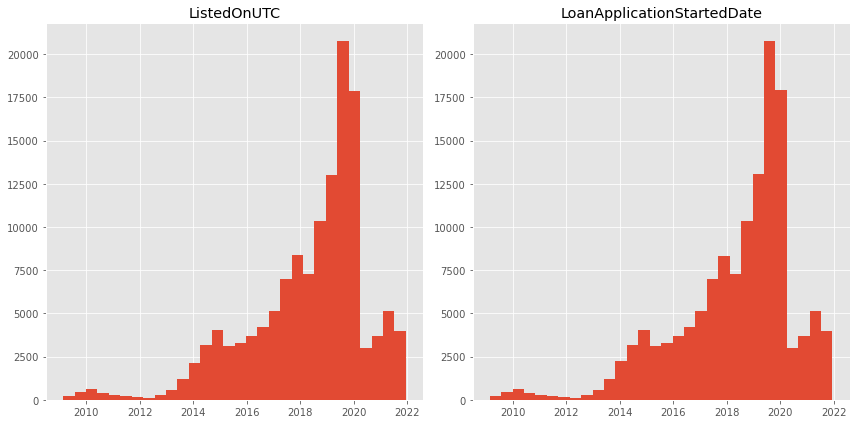

In [17]:
# plot date variables and find the variables with similar distributions, keep only one of them.
fig, axs = plt.subplots(1, 2, figsize=(12,6))
axs[0].hist(loan['ListedOnUTC'],bins=30)
axs[0].set_title("ListedOnUTC")
axs[1].hist(loan['LoanApplicationStartedDate'],bins=30)
axs[1].set_title("LoanApplicationStartedDate")
fig.tight_layout()



In [18]:
#drop variables with similar distribution (same distribution means high correlations)
loan=loan.drop(["LoanApplicationStartedDate"], 1)

The weight of evidence is used when a category variable contains too much classes, which make the coeffecient be poorly estimated. It is defined as $w(x)=log(\frac{P(X=x|Y=0)}{P(X=x|Y=1)})$, where $w(x)$ is the weight of evidence for varaible x.

In [19]:
# for category variables with too many classes, use weight of evidence(woe) to convert them into continuous value 
# Define the weight of evidence 
def woe_list(df,feature_list,target):
    n0=sum(1-df[target])
    n1=sum(df[target])
    for i in range(len(feature_list)):
        lst =pd.crosstab(df[feature_list[i]],df[target])
        lst1=lst.replace(0, 0.5)
        lst1["woe_"+ feature_list[i]]=np.log((lst1[0]/n0)/(lst1[1]/n1)) 
        df=pd.merge(df, lst1["woe_"+ feature_list[i]], on=feature_list[i], how="left")
        df=df.drop(feature_list[i], 1)
    return df

f_list=["ListedOnUTC"]
loan=woe_list(loan,f_list,"loanstatus")

##### For Bool type variables:

In [20]:
#Covert bool type variables by replacing Ture with 0 and False with 1
loan = loan.replace({True: 0, False: 1})

##### For Object variables:

In [21]:
# Find object variables
loan.select_dtypes('object')

,Country,EmploymentDurationCurrentEmployer,Rating,ActiveLateCategory,CreditScoreEsMicroL,ActiveLateLastPaymentCategory
0,EE,MoreThan5Years,C,180+,NaN,8-15
1,EE,MoreThan5Years,B,180+,NaN,180+
2,EE,UpTo3Years,A,180+,NaN,180+
3,ES,UpTo5Years,F,180+,M3,180+
4,ES,UpTo1Year,HR,180+,M5,180+
...,...,...,...,...,...,...
133784,FI,UpTo5Years,E,180+,NaN,180+
133785,FI,MoreThan5Years,D,NaN,NaN,NaN
133786,ES,MoreThan5Years,HR,NaN,M4,NaN
133787,EE,UpTo3Years,C,NaN,NaN,NaN


In [22]:
# For country variable, the count shown as below.
loan_clean=loan
loan['Country'].value_counts()

EE    74187
FI    34486
ES    24820
SK      296
Name: Country, dtype: int64

In [23]:
# The number of "EE" is almost euqal to the sum of rest classes, replace EE with 0 and rest with 1 
loan_clean['Country'] = (loan_clean['Country'] == "EE").astype(int)

In [24]:
# For "EmploymentDurationCurrentEmployer" variable, the count shown as below.
dict_emp=loan['EmploymentDurationCurrentEmployer'].value_counts().to_dict()
dict_emp


{'MoreThan5Years': 49783,
 'UpTo5Years': 29615,
 'UpTo1Year': 25006,
 'Retiree': 7323,
 'UpTo2Years': 6095,
 'Other': 5509,
 'UpTo3Years': 5062,
 'UpTo4Years': 3409,
 'TrialPeriod': 697}

In [25]:
# Except the major three classes, combine the rest of the classes as one single type
dict_emp[list(dict_emp)[0]]=0
dict_emp[list(dict_emp)[1]]=1
dict_emp[list(dict_emp)[2]]=2
for i in range(3,9):
    dict_emp[list(dict_emp)[i]]=3
loan_clean['EmploymentDurationCurrentEmployer'] = loan_clean['EmploymentDurationCurrentEmployer'].replace(dict_emp)


In [26]:
# For variable "Rating", the count shown as below
loan['Rating'].value_counts()


D     25480
E     25209
F     23567
C     19701
HR    14516
B     13506
A      5077
AA     4001
Name: Rating, dtype: int64

In [27]:
# Too much classes with similar count, use weight of evidence(woe)
loan_clean=woe_list(loan_clean,["Rating"],"loanstatus")

In [58]:
loan['ActiveLateCategory'].value_counts()

180+       69195
1-7         2846
31-60       1643
8-15        1427
16-30       1265
61-90       1024
91-120       754
121-150      730
151-180      650
Name: ActiveLateCategory, dtype: int64

In [28]:
# Too much missing values and the majority existing values belonging to one classes, drop it 
loan['ActiveLateCategory'].value_counts()
loan_clean=loan_clean.drop('ActiveLateCategory',1)

In [29]:
# Too much missing values and the majority existing values belonging to one classes, drop it 
loan['CreditScoreEsMicroL'].value_counts()
loan_clean=loan_clean.drop('CreditScoreEsMicroL',1)

In [30]:
# The class count for variable "ActiveLateLastPaymentCategory"
dict_act=loan['ActiveLateLastPaymentCategory'].value_counts().to_dict()
dict_act


{'180+': 45206,
 '1-7': 7622,
 '31-60': 6189,
 '16-30': 5636,
 '91-120': 4712,
 '61-90': 4549,
 '8-15': 4127,
 '121-150': 1980,
 '151-180': 1720}

In [31]:
# Except the major class, combine the rest of the classes as one single type
dict_act[list(dict_act)[0]]=0
for i in range(1,9):
    dict_act[list(dict_act)[i]]=1
loan_clean['ActiveLateLastPaymentCategory'] = loan_clean['ActiveLateLastPaymentCategory'].replace(dict_act)

In [32]:
# Check if there is any category variables
loan_clean.dtypes.value_counts()

float64    31
int64       9
dtype: int64

In [33]:
# Replace NA value with mean
loan_clean=loan_clean.fillna(loan_clean.mean())

In [34]:
# Correlation between feature and target variables
# Delete the variables having low or no correlation with target variables
corr_list1=loan_clean.corr()['loanstatus'].abs().sort_values(ascending=False)
corr_list_new=corr_list1[corr_list1>0.01].index.values.tolist()
loan_clean=loan_clean[corr_list_new]
loan_clean.head(3)

,loanstatus,woe_ListedOnUTC,Country,LanguageCode,woe_Rating,LoanDuration,Interest,EmploymentStatus,MaritalStatus,OccupationArea,AppliedAmount,UseOfLoan,Education,IncomeFromPrincipalEmployer,MonthlyPayment,ActiveLateLastPaymentCategory,DebtToIncome,Age,ModelVersion,IncomeOther,Gender,PreviousRepaymentsBeforeLoan,CreditScoreEeMini,RefinanceLiabilities,ExistingLiabilities,NoOfPreviousLoansBeforeLoan,NewCreditCustomer,PreviousEarlyRepaymentsCountBeforeLoan,FreeCash,AmountOfPreviousLoansBeforeLoan,VerificationType,IncomeFromFamilyAllowance,IncomeFromChildSupport,IncomeFromLeavePay,IncomeTotal
0,1,0.334674,1,1,0.395379,60,20.97,6.0,2.0,1.0,2125.0,2,4.0,0.0,62.05,1.0,26.29,53,2.0,0.0,1.0,590.95,1000.0,6,8,1.0,1,0.0,10.92,500.0,4.0,0.0,0.0,0.0,354.0
1,1,0.167620,1,1,0.633293,60,17.12,5.0,2.0,7.0,3000.0,3,5.0,900.0,84.75,0.0,30.58,50,1.0,0.0,1.0,445.26,1000.0,0,4,1.0,1,1.0,78.80,1800.0,1.0,0.0,0.0,0.0,900.0
2,0,0.618853,1,1,0.661138,60,13.67,5.0,4.0,8.0,10630.0,3,4.0,600.0,268.57,0.0,26.71,44,2.0,600.0,0.0,0.00,1000.0,3,7,0.0,0,0.0,349.43,0.0,4.0,0.0,0.0,0.0,1200.0


In [35]:
#find the variables with high correlations
cor1 = loan_clean.corr().abs()
list1 = cor1.stack().sort_values(ascending=False).drop_duplicates()  
high_corr= list1[list1>0.7].index.values.tolist()
high_corr.remove(high_corr[0])

display(list1)


loanstatus                     loanstatus                         1.000000e+00
MaritalStatus                  EmploymentStatus                   9.179854e-01
Country                        LanguageCode                       8.800215e-01
NoOfPreviousLoansBeforeLoan    AmountOfPreviousLoansBeforeLoan    7.893991e-01
AppliedAmount                  MonthlyPayment                     7.739878e-01
                                                                      ...     
IncomeOther                    CreditScoreEeMini                  6.103384e-04
IncomeFromFamilyAllowance      LoanDuration                       3.192707e-04
ActiveLateLastPaymentCategory  MonthlyPayment                     3.154217e-04
IncomeTotal                    CreditScoreEeMini                  3.422720e-05
Country                        CreditScoreEeMini                  7.520633e-15
Length: 596, dtype: float64

In [36]:
# for variable pairs with high correlation, keep only one of them
columnlist=list(loan_clean.columns)
len(high_corr)
for i in range(len(high_corr)):
    if "loanstatus" in high_corr[i]:
        columnlist=columnlist
    else:
        if high_corr[i][0] in columnlist and high_corr[i][1] in columnlist:
            columnlist.remove(high_corr[i][1])
        else:
            columnlist=columnlist
loan_final=loan_clean[columnlist]


In [37]:
loan_final.head()

,loanstatus,woe_ListedOnUTC,Country,woe_Rating,LoanDuration,Interest,AppliedAmount,UseOfLoan,Education,IncomeFromPrincipalEmployer,ActiveLateLastPaymentCategory,DebtToIncome,Age,ModelVersion,IncomeOther,Gender,PreviousRepaymentsBeforeLoan,CreditScoreEeMini,RefinanceLiabilities,ExistingLiabilities,NoOfPreviousLoansBeforeLoan,NewCreditCustomer,PreviousEarlyRepaymentsCountBeforeLoan,FreeCash,VerificationType,IncomeFromFamilyAllowance,IncomeFromChildSupport,IncomeFromLeavePay,IncomeTotal
0,1,0.334674,1,0.395379,60,20.97,2125.0,2,4.0,0.0,1.0,26.29,53,2.0,0.0,1.0,590.95,1000.00000,6,8,1.0,1,0.0,10.92,4.0,0.0,0.0,0.0,354.0
1,1,0.167620,1,0.633293,60,17.12,3000.0,3,5.0,900.0,0.0,30.58,50,1.0,0.0,1.0,445.26,1000.00000,0,4,1.0,1,1.0,78.80,1.0,0.0,0.0,0.0,900.0
2,0,0.618853,1,0.661138,60,13.67,10630.0,3,4.0,600.0,0.0,26.71,44,2.0,600.0,0.0,0.00,1000.00000,3,7,0.0,0,0.0,349.43,4.0,0.0,0.0,0.0,1200.0
3,1,0.129468,0,-0.713125,60,40.40,1500.0,2,2.0,863.0,0.0,7.36,42,1.0,0.0,0.0,0.00,944.93062,0,1,0.0,0,1.0,449.47,3.0,0.0,0.0,0.0,863.0
4,1,0.919607,0,-0.428388,48,68.39,1595.0,7,4.0,0.0,0.0,36.04,34,2.0,0.0,1.0,0.00,944.93062,2,5,0.0,0,0.0,95.81,4.0,0.0,0.0,0.0,697.0


## Part II: Construction of the model

### Split the dataset

In [38]:
#Split the data into training set and test set
import random
from sklearn.model_selection import train_test_split
training_data, test_data = train_test_split(loan_final,random_state=None, shuffle=True)
train_x=training_data.drop(['loanstatus'], 1) 
train_y=training_data[['loanstatus']]
test_x=test_data.drop(['loanstatus'], 1)
test_y=test_data[['loanstatus']]

### K-Nearest Neighbour (KNN) Algorithm

In [39]:
#KNN with 5 neighbours
from sklearn.neighbors import KNeighborsClassifier
knn5 = KNeighborsClassifier(n_neighbors = 5)  
knn5.fit(train_x, train_y)

knn5.score(test_x, test_y)

0.6097524515666108

The F1 score for knn algorithm is quite low with only 0.61 approximately but the score below for random forest is 0.91 approximately. This means that for variable selection is acceptable, but more data preparation operation is needed for KNN. Considering the data distribution, outlier deletion and zero-mean normalisation is used. In the following part, KNN will use the dataset afternormalisation and random forest will use the dataset before normalisation.

In [40]:
#Re-do data preparation: delete the outliers and perform normalisation
from sklearn.preprocessing import StandardScaler
# Remove outliers
loan_knn = loan_final[(np.abs(scipy.stats.zscore(loan_final)) < 3).all(axis=1)]
# Zero mean normalisation
loan_knn.iloc[:,1:]=(loan_knn.iloc[:,1:]-loan_knn.iloc[:,1:].mean())/loan_knn.iloc[:,1:].std()

In [41]:
#split the new dataset
training_data_knn, test_data_knn = train_test_split(loan_knn,random_state=None, shuffle=True)
train_x_knn=training_data_knn.drop(['loanstatus'], 1) 
train_y_knn=training_data_knn[['loanstatus']]
test_x_knn=test_data_knn.drop(['loanstatus'], 1)
test_y_knn=test_data_knn[['loanstatus']]

In [42]:
#construct knn model with new dataset

knn5.fit(train_x_knn, train_y_knn)
print("The score of KNN Algorithm is {:.2f}%".format(knn5.score(test_x_knn, test_y_knn)*100))

The score of KNN Algorithm is 86.97%


Maximum KNN Score is 87.25%
KNN Score reaches maximum when number of neighbors is 9


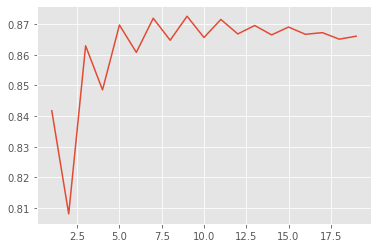

In [43]:
#select the best hyperparameter of knn
score_list_knn=[]
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn.fit(train_x_knn, train_y_knn)
    score_list_knn.append(knn.score(test_x_knn, test_y_knn))

x=range(1,20)
print("Maximum KNN Score is {:.2f}%".format(max(score_list_knn)*100))
print("KNN Score reaches maximum when number of neighbors is {:}".format(x[np.argmax(score_list_knn)]))

plt.plot(x, score_list_knn)
plt.show()


In [44]:
# Construct model with Random Forest Algorithm
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, oob_score=True, max_depth=10, min_samples_leaf = 20,
                            min_samples_split=10)
rf.fit(train_x, train_y) 
print("Score of Random Forest algorithm is {:.2f}%".format(rf.score(test_x, test_y)*100))


Score of Random Forest algorithm is 91.17%


In this part, three model was constructed:

    1. First model using KNN algorithm with 5 neighbours. F1 score only $61.18\%$, meaning that this model performance is disappointing.
    
    2. Second model using KNN algorithm with optimal hyperparameter. F1 score is $87.06\%$, meaning well-performance model.
    
    3. Third model using Random Forest algorithm with F1 score $91.23\%$. This is a well-performance model.

## Part III: Analyze and Evaluation

### Confusion Matrix and Cross-Validation for KNN 

In [45]:
# confusion matrix for KNN
from sklearn.metrics import classification_report, confusion_matrix
knn_opt = KNeighborsClassifier(n_neighbors = x[np.argmax(score_list_knn)])  # n_neighbors means k
knn_opt.fit(train_x_knn, train_y_knn)
knn_opt_prediction = knn_opt.predict(test_x_knn)
print(confusion_matrix(test_y_knn, knn_opt_prediction))
print(classification_report(test_y_knn, knn_opt_prediction))

[[10041  1924]
 [ 1366 12483]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86     11965
           1       0.87      0.90      0.88     13849

    accuracy                           0.87     25814
   macro avg       0.87      0.87      0.87     25814
weighted avg       0.87      0.87      0.87     25814



In [46]:
#Cross-validation for KNN with optimal hyperparameter
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
x_knn_opt_cv=np.array(loan_knn.iloc[:,1:])
y_knn_opt_cv=np.array(loan_knn.iloc[:,0])
# 10-fold cross validation for knn
knn_opt_cv_scorelist = []
knn_opt_cv = KNeighborsClassifier(n_neighbors = x[np.argmax(score_list_knn)])
for train_index, test_index in kf.split(x_knn_opt_cv):
    train_x_knn_cv,test_x_knn_cv = x_knn_opt_cv[train_index],x_knn_opt_cv[test_index]
    train_y_knn_cv,test_y_knn_cv = y_knn_opt_cv[train_index],y_knn_opt_cv[test_index]
    knn_opt_cv.fit(train_x_knn_cv, train_y_knn_cv) 
    knn_opt_cv_scorelist.append(knn_opt_cv.score(test_x_knn_cv,test_y_knn_cv))

print("The cross validation score list of KNN for each fold:", knn_opt_cv_scorelist)
print("The average score of KNN is:", np.mean(knn_opt_cv_scorelist))

The cross validation score list of KNN for each fold: [0.758086383885338, 0.720801859384079, 0.8289754018981212, 0.8822390083284912, 0.9020918070889018, 0.9084745762711864, 0.9046973365617433, 0.9027602905569008, 0.9018886198547216, 0.9196125907990315]
The average score of KNN is: 0.8629627874628515


### Confusion Matrix and Cross-Validation for Random Forest 

In [47]:
# confusion matrix for random forest
rf_prediction = rf.predict(test_x)
print(confusion_matrix(test_y, rf_prediction))
print(classification_report(test_y, rf_prediction))

[[13912  2225]
 [  728 16583]]
              precision    recall  f1-score   support

           0       0.95      0.86      0.90     16137
           1       0.88      0.96      0.92     17311

    accuracy                           0.91     33448
   macro avg       0.92      0.91      0.91     33448
weighted avg       0.91      0.91      0.91     33448



In [48]:
#Cross-validation for Random Forest
x_rf_cv=np.array(loan_final.iloc[:,1:])
y_rf_cv=np.array(loan_final.iloc[:,0])
# 10-fold cross validation for random forest
rf_cv_scorelist = []
rf_cv = RandomForestClassifier(n_estimators = 100, oob_score=True, max_depth=10, 
                               min_samples_leaf = 20, min_samples_split=10)
for train_index, test_index in kf.split(x_rf_cv):
    train_x_rf_cv,test_x_rf_cv = x_rf_cv[train_index],x_rf_cv[test_index]
    train_y_rf_cv,test_y_rf_cv = y_rf_cv[train_index],y_rf_cv[test_index]
    rf_cv.fit(train_x_rf_cv, train_y_rf_cv) 
    rf_cv_scorelist.append(rf_cv.score(test_x_rf_cv,test_y_rf_cv))

print("The cross validation score list of Random Forest for each fold::", rf_cv_scorelist)
print("The average score of Random Forest is:", np.mean(rf_cv_scorelist))

The cross validation score list of Random Forest for each fold:: [0.8811570371477689, 0.857762164586292, 0.859780252634726, 0.8875850213020405, 0.9191269900590477, 0.9331788623962927, 0.9275730622617535, 0.9362433664698407, 0.9449136706779281, 0.9676334280161459]
The average score of Random Forest is: 0.9114953855551837


# Model update Notification

In [49]:
from scipy.stats import ks_2samp
import math

### Kolmogorov–Smirnov test (KS-test)

KS-test helps to measure the ability of this model distinct 'good' and 'bad' customer. If the KS-statistic<0.25, meaning that this model do not have enough ability to make loan decision and hence need to use more recent data to update the model.

In [50]:
def ks_test(actual, prediction, algorithm_hyper):
    actual_val=actual.to_numpy()
    actual_val=actual_val.reshape(prediction.shape)
    ks_stat=ks_2samp(prediction[actual_val==1], prediction[actual_val!=1]).statistic
    print("The KS Statistics for "+algorithm_hyper+" is:",ks_stat)
    if ks_stat>0.25:
        print("The model is good enough to distinct customers and no need to be updated")
    else:
        print("Update needed! The model do NOT have enough ability to distinct customers")


In [51]:
# The KS-test result for KNN algorithm with optimal hyperparameter
knn_opt_prediction = knn_opt.predict(test_x_knn)
ks_test(test_y_knn,knn_opt_prediction,"KNN with optimal hyperparameter")


The KS Statistics for KNN with optimal hyperparameter is: 0.7405623793155338
The model is good enough to distinct customers and no need to be updated


In [52]:
# Try the model mentioned in Part II, which using KNN algorithm without performing normalisation
knn5_prediction = knn5.predict(test_x)
ks_test(test_y,knn5_prediction,"KNN with 5 neighbours")


The KS Statistics for KNN with 5 neighbours is: 0.0961535890300288
Update needed! The model do NOT have enough ability to distinct customers


In [53]:
# The KS-test result for Random Forest algorithm
rf_prediction = rf.predict(test_x)
ks_test(test_y,rf_prediction,"Random Forest")


The KS Statistics for Random Forest is: 0.8200639284516942
The model is good enough to distinct customers and no need to be updated


### Population Stability Index(PSI)

PSI can describe how much change of a varaible change. It could be used in monitor changes in features and measure the potential model performance. The formula of calculating PSI is: $PSI=\sum_{i=1}^{n}{(Actual\%-Prediction\%)*log(\frac{Actual\%}{Prediction\%})}$. When PSI>0.1, it means model is unstable and need more recent data to update the model.

In [54]:
def psi(actual, prediction, algorithm_hyper):
    actual_val=actual.to_numpy()
    actual_val=actual_val.reshape(prediction.shape)
    n0_actual=sum(1-actual_val)
    n1_actual=sum(actual_val)
    n0_prediction=sum(1-prediction)
    n1_prediction=sum(prediction)
    psi_0=(n0_actual-n0_prediction)/len(actual_val)*np.log(n0_actual/n0_prediction)
    psi_1=(n1_actual-n1_prediction)/len(actual_val)*np.log(n1_actual/n1_prediction)
    psi_final=psi_0+psi_1
    print("The PSI for "+algorithm_hyper+" is:",psi_final)
    if psi_final<0.1:
        print("The model is stable and no need to be updated")
    else:
        print("Update needed! The model is UNSTABLE now")


In [55]:
# Try the model mentioned in Part II, which using 5-neighbour KNN algorithm without performing normalisation
psi(test_y, knn5_prediction,"KNN with 5 neighbours")

The PSI for KNN with 5 neighbours is: 0.3978728265922583
Update needed! The model is UNSTABLE now


In [56]:
# The PSI result for KNN algorithm with optimal hyperparameter
psi(test_y_knn, knn_opt_prediction,"KNN with optimal parameter")

The PSI for KNN with optimal parameter is: 0.0018862209497404019
The model is stable and no need to be updated


In [57]:
# The PSI for Random Forest algorithm
psi(test_y,rf_prediction,"Random Forest")

The PSI for Random Forest is: 0.008069399165649088
The model is stable and no need to be updated
